# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from SJ_config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# cities_df = pd.DataFrame(city_number, cities)
cities_df = pd.DataFrame(cities)
cities_df.tail()

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

588

In [3]:

## The API call will require me to break up the list of cities into smaller groups (Free API <60 calls per minute)
## So, adding another column to the dataframe (city_number) so that I can use that to break the df

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_number = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination; also add a column with City Number
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_number.append(len(cities))        

cities_df = pd.DataFrame(city_number, cities)
# cities_df = pd.DataFrame(cities)
cities_df.tail()

## Tried to use the city_number column to break the df into a smaller df (am running into API size constraints)
## Getting key error when I run the .loc line below. Have tried a few other variants to no avail  

# cities1_df = cities_df.loc[cities_df['city_number'] <= 50]
# cities1_df.tail()

### Another try using the help of Google - No luck
# df_new1, df_new2 = cities_df[:10, :], cities_df[10:, :] if len(cities_df) > 10 else cities_df, None

,0
kitob,660
okhotsk,661
tsabong,662
crab hill,663
sarai,664


In [4]:
# Manually breaking the list of cities <print(cities)> into 12 lists so that I can make fewer than 60 API calls at a time
# cities_1 = ['takoradi', 'busselton', 'cape town', 'lata', 'kapaa', 'nome', 'butaritari', 'santa maria', 'bredasdorp', 'prince rupert', 'isangel', 'pingliang', 'kaitangata', 'vao', 'bay roberts', 'clyde river', 'tuatapere', 'lacey', 'port hedland', 'carnarvon', 'castro', 'onguday', 'chagda', 'ribeira grande', 'palmer', 'sur', 'albany', 'punta arenas', 'jamestown', 'palmeira', 'birao', 'leningradskiy', 'illoqqortoormiut', 'bethel', 'show low', 'fairbanks', 'ushuaia', 'beloha', 'loukhi', 'mar del plata', 'rikitea', 'sao joao da barra', 'bluff', 'hilo', 'karratha', 'baracoa', 'port alfred', 'bestobe', 'talnakh', 'dawei', 'hualmay', 'tuktoyaktuk', 'abu zabad', 'hobart', 'palafrugell']
# cities_2 = ['flinders', 'celestun', 'tidore', 'amazar', 'tura', 'estelle', 'goba', 'dikson', 'amot', 'anamur', 'tiksi', 'bengkulu', 'kegayli', 'atuona', 'wadi maliz', 'houma', 'tombouctou', 'sao francisco do sul', 'solovetskiy', 'nikolskoye', 'pisco', 'lazaro cardenas', 'hamilton', 'bambous virieux', 'turukhansk', 'sao filipe', 'cockburn town', 'tabivere', 'christchurch', 'chuy', 'lavrentiya', 'dekalb', 'bathsheba', 'iskitim', 'jipijapa', 'touros', 'fort-shevchenko', 'saint-philippe', 'urengoy', 'freeport', 'san rafael', 'dingle', 'yerraguntla', 'kamaishi', 'belushya guba', 'jiroft', 'dalinghe', 'san cristobal', 'buzmeyin', 'le portel', 'mayo', 'rolim de moura', 'vaitupu', 'chapais', 'hervey bay']
# cities_3 = ['warqla', 'coihaique', 'inirida', 'mackay', 'changping', 'tyukhtet','xingyi', 'severo-kurilsk', 'xiongzhou', 'campbell river', 'saint anthony', 'petropavlovsk-kamchatskiy', 'aloleng', 'sitka', 'jacareacanga', 'pevek', 'bantogon', 'sentyabrskiy', 'lima duarte', 'monte patria', 'rungata', 'eskasem', 'gizo', 'makakilo city', 'bonnyville', 'fortuna', 'luderitz', 'cairns', 'tomatlan', 'tasiilaq', 'tumannyy', 'oistins', 'acajutla', 'guskhara', 'san francisco del mar', 'limoeiro do norte', 'faanui', 'lasa', 'port blair', 'codrington', 'kerteh', 'turbat', 'avera', 'dedovichi', 'hihifo', 'livingston', 'provideniya', 'nizhneyansk', 'kodiak', 'mana', 'san ignacio', 'saldanha', 'kadykchan', 'dhidhdhoo', 'olinda']
# cities_4 = ['fort nelson', 'melo', 'buala', 'bejar', 'hat yai', 'taltal', 'zvishavane', 'barroualie', 'willmar', 'iqaluit', 'ingham', 'gat', 'sosnovka', 'sidi bu zayd', 'erzin', 'leshukonskoye', 'athabasca', 'thompson', 'kyabe', 'saleaula', 'north bend', 'mount isa', 'kupang', 'winneba', 'bilibino', 'sarangani', 'katangli', 'nara', 'santa isabel do rio negro', 'saskylakh', 'hami', 'elizabeth city', 'surman', 'padang', 'constitucion', 'ostrovnoy', 'san luis', 'waingapu', 'paamiut', 'homer', 'henties bay', 'mersing', 'bocaranga', 'poronaysk', 'raudeberg', 'saint simons', 'hoi an', 'hays', 'sawakin', 'ilulissat', 'morro bay', 'port lincoln', 'santa fe', 'mrirt', 'chamalieres', 'kazalinsk', 'saint george', 'liusha']
# cities_5 = ['balkanabat', 'chibuto', 'ambulu', 'madimba', 'lufilufi', 'nouadhibou', 'severnyy', 'gravdal', 'cabras', 'saint-augustin', 'sosnovo-ozerskoye', 'elliot', 'agua branca', 'husavik', 'mizdah', 'kuche', 'escanaba', 'arlit', 'sao francisco de assis', 'uniontown', 'zhuanghe', 'listvyanskiy', 'mazagao', 'yirol', 'khandyga', 'narodychi', 'te anau', 'svetlaya', 'muros', 'frankfort', 'half moon bay', 'rabnita', 'auki', 'krasnyy oktyabr', 'porvoo', 'arcata', 'lorengau', 'kinel', 'kitimat', 'faya', 'mayor pablo lagerenza', 'port shepstone', 'barra do garcas', 'poya', 'ust-kan', 'temaraia', 'tazovskiy', 'bahia blanca', 'artyk', 'amderma', 'necochea', 'ucluelet', 'bath', 'burica', 'margate', 'uruzgan', 'blind river']
# cities_6 = ['itarema', 'cayenne', 'vicuna', 'ararat', 'san vicente', 'tarpon springs', 'kaeo', 'puerto penasco', 'mantua', 'port hawkesbury', 'rio cuarto', 'grenville', 'padilla', 'pahrump', 'rawannawi', 'mera', 'bandarbeyla', 'ngukurr', 'haysville', 'alenquer', 'saint-paul', 'narayanganj', 'sainte-suzanne', 'grand gaube', 'bodden town', 'roald', 'bundaberg', 'adre', 'labutta', 'ust-kuyga', 'andrelandia', 'bonavista', 'kaltasy', 'srednekolymsk', 'chifeng', 'clarence town', 'gornopravdinsk', 'rawson', 'namibe', 'vardo', 'carutapera', 'boca do acre', 'zalantun', 'broken hill', 'teotitlan', 'kidal', 'nanortalik', 'tessalit', 'lichuan', 'luleburgaz', 'pimentel', 'kachug', 'mehamn', 'airai', 'sataua', 'phan rang', 'lagoa', 'andenes']
# cities_7 = ['port hueneme', 'port macquarie', 'taicheng', 'narsaq', 'tabiauea', 'naze', 'grande prairie', 'jahanabad', 'kangaba', 'honningsvag', 'tchollire', 'champerico', 'macaboboni', 'sola', 'sorvag', 'marawi', 'neuquen', 'ilmajoki', 'kaohsiung', 'novyy urgal', 'skalistyy', 'asyut', 'teguise', 'adrar', 'ambilobe', 'samarai', 'gobabis', 'zalesovo', 'ijaki', 'sabla', 'udachnyy', 'flin flon', 'umm lajj', 'szczecinek', 'jagalur', 'kailua', 'seekonk', 'nossa senhora das dores', 'brus laguna', 'zaria', 'houlton', 'andarab', 'hailar', 'coquimbo', 'tucurui', 'sterling', 'mitsamiouli', 'palauig', 'vysokogornyy', 'acarau', 'pavlivka', 'mangai', 'gazli', 'abu kamal', 'ilhabela']
# cities_8 = ['kolyvan', 'tres arroyos', 'nuuk', 'bertoua', 'taber', 'dumai', 'ashland', 'laguna', 'sokolow podlaski', 'gulu', 'quang ngai', 'barsuki', 'sergeyevka', 'brokopondo', 'marsa matruh', 'la palma', 'cumberland', 'port hardy', 'san quintin', 'leninsk', 'makinsk', 'simbahan', 'cartagena', 'kholmogory', 'vanimo', 'ixtapa', 'bargal', 'pangai', 'morgan city', 'wote', 'nishihara']
# cities_9 = ['anloga', 'dongsheng', 'aksarka', 'deputatskiy', 'olga', 'zyryanovsk', 'conde', 'mandiana', 'ahipara', 'usak', 'manmad', 'miraflores', 'berbera', 'bugulma', 'kazachinskoye', 'yar-sale', 'palabuhanratu', 'deniliquin', 'bilma', 'cherskiy', 'aden', 'ust-koksa', 'saint-georges', 'polunochnoye', 'kavieng', 'feijo', 'iztapa', 'sibolga', 'dunedin', 'acapulco', 'clinton', 'olafsvik', 'goldsboro', 'ajdabiya', 'khilok', 'evensk', 'lyskovo', 'dickinson', 'cap malheureux', 'eirunepe']
# cities_10 = ['nabire', 'sioux lookout', 'haines junction', 'tekeli', 'asosa', 'vila velha', 'yomou', 'victoria', 'seoul', 'lapeer', 'okhotsk', 'palm coast', 'tilichiki', 'kerki', 'mys shmidta', 'lompoc', 'quesnel', 'puerto ayora', 'kobelyaky', 'mandurah', 'mandalgovi', 'kabo', 'macas', 'lashio', 'tromso', 'sao luiz gonzaga', 'hasaki', 'attawapiskat', 'copiapo', 'hermanus', 'barentsburg', 'mataura', 'taolanaro', 'barrow', 'georgetown', 'kihei', 'klaksvik', 'klyuchi', 'yellowknife', 'neiafu', 'mahebourg', 'aksu', 'esperance', 'khatanga', 'udalguri', 'dharchula', 'geraldton', 'aksehir', 'east london', 'souillac', 'cidreira', 'praia', 'vaini', 'kruisfontein', 'avarua', 'japura', 'northam']
# cities_11 = ['tirano', 'vanavara', 'toliary', 'ust-nera', 'gannan', 'bure', 'semey', 'iquitos', 'dandong', 'caravelas', 'mahaicony', 'cacapava do sul', 'csorna', 'san policarpo', 'kilindoni', 'alofi', 'gambo', 'mehran', 'vila franca do campo', 'qasigiannguit', 'hay river', 'pangnirtung', 'homa bay', 'ponta do sol', 'zhigansk', 'guerrero negro', 'richards bay', 'tuchola', 'san patricio', 'upernavik', 'tsihombe', 'visnes', 'lokosovo', 'inhambane', 'jizan', 'puerto suarez', 'sao gabriel da cachoeira', 'grand river south east', 'xinqing', 'kavaratti', 'enshi', 'kloulklubed', 'trincomalee', 'mahadday weyne']
# cities_12 = ['khormuj', 'sim', 'umzimvubu', 'lebu', 'norman wells', 'port augusta', 'atambua', 'semporna', 'longyearbyen', 'bac lieu', 'broome', 'novomikhaylovskiy', 'arraial do cabo', 'oudtshoorn', 'mount gambier', 'anadyr', 'chokurdakh', 'angoche', 'katsuura', 'sorland', 'palana', 'port elizabeth', 'asau', 'torbay', 'dovhe', 'qaanaaq', 'bubaque', 'korla', 'new norfolk', 'tabuk', 'lafia', 'andros town', 'oranjemund', 'uyuni', 'gambela', 'mocambique', 'hithadhoo', 'benguela']
# len(cities_1)


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
## First going to do the remaining exercise with a short list of cities to make sure the API query works correctly.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# New short cities list just to check whether this will work
cities_test = ["London", "Paris", "Las Vegas", "Stockholm", "Sydney", "Hong Kong", 'port hueneme', 
               'port macquarie', 'taicheng', 'naze', 'grande prairie', 'Coihaique', 'Hobart', 'Port Moresby']

# list for response results
lat = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

## loop through cities, make API request, and append desired results
for city in cities_test:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    
# # It works.  Was able to generate all the scatter plots with these cities.

In [6]:
## Now adding another short list of cities to see whether I can add a 15 second time lag between two API calls. 
## With the real city lists, will use 65 seconds (needs to be more than 1 minute)

time.sleep(15)

cities_t2 = ["Delhi", "Johannesburg", "Copenhagen", "Lima", "Baltimore", "Vancouver", "Tromso", 
             'takoradi', 'busselton', 'cape town', 'lata', 'kapaa', 'nome', 'butaritari', 
             'santa maria', 'bredasdorp', 'prince rupert']

for city in cities_t2:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])

## Worked! So, I should be able to use this recurring method for the 12 city lists.  

SJ NOTE:
- Tried to run the code above for the different city lists (cities_1, cities_2, .... cities_12) but kept getting an error on coordinates. <lat.append(response['coord']['lat'])> fails. 

- Am assuming that not all cities from CitiPy are found on Open Weather.

- Tried to insert an IF statement so that the code would continue to compile if it didn't find a city
<if response['coord']['lat'] == "" next city> didn't work. A couple of alternatives didn't work either.

- The remainder of this workbook is based on just the cities in cities_test and cities_t2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# build a dataframe 
weather_data = {"Latitude": lat, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed}
weather_data = pd.DataFrame(weather_data)
weather_data.tail()

,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
26,30.04,59.00,58,1,2.80
27,3.07,84.25,63,77,1.50
28,-16.02,78.80,50,14,3.36
29,-34.53,64.00,82,100,12.75
30,54.32,51.80,81,90,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

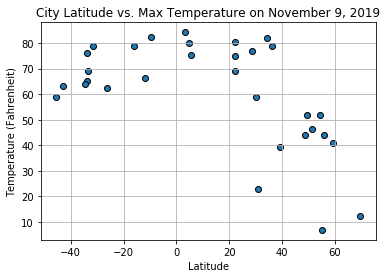

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature on November 9, 2019")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_and_Temps.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

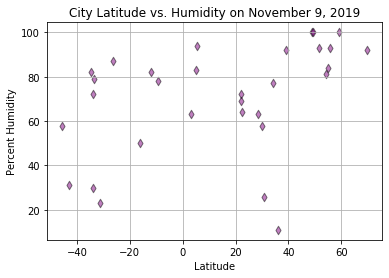

In [9]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="d", alpha = .5, color="purple", edgecolors="black")
plt.title("City Latitude vs. Humidity on November 9, 2019")
plt.ylabel("Percent Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_and_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

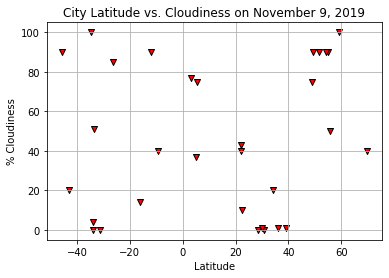

In [10]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="v", color="red", edgecolors="black")
plt.title("City Latitude vs. Cloudiness on November 9, 2019")
plt.ylabel("% Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_and_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

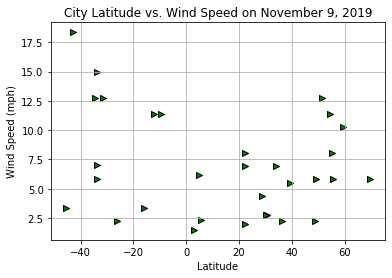

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker=">", color="green", edgecolors="black")
plt.title("City Latitude vs. Wind Speed on November 9, 2019")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_and_windiness.png")
plt.show()

SJ FINDINGS SUMMARY: 
- The  cities examined range from -45 to +70 latitude
- Max temperatures plot: 
    - The fact that the southern hemisphere (negative latitude) is in summer whereas the northern hemisphere is in winter is clear based on the maximum temperatures. Also, the further away from the equator, the lower the max temperatures.
    - However, nearness to the equator matters and the northern hemisphere cities closest to the equator (lat = 0) have maximum temperatures that are similar to southern hemisphere cities that are close to the equator.
- Humidity and Cloudiness plots:
    - On November 9, 2019, at the time of the query, cities with latitudes between 50 and 60 were facing 80-100% humidity. These cities were also the cloudiest of the cities examined.
    - There don't appear to be strong latitude-based trends for either humidity or cloudiness.
- Wind Speed:
    - Roughly 13% (4/31) of the cities examined were facing winds of greater than 12.5 miles per hour at the time of the query.
    - Wind speed doesn't appear to correlate with latitude.